In [ ]:
!pip install cdlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.5 MB/s eta 0:00:00


In [ ]:
!wget https://andreafailla.github.io/uploads/data/got-s1-edges.csv

--2024-12-02 08:10:52--  https://andreafailla.github.io/uploads/data/got-s1-edges.csv
Resolving andreafailla.github.io (andreafailla.github.io)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to andreafailla.github.io (andreafailla.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10554 (10K) [text/csv]
Saving to: ‘got-s1-edges.csv’

got-s1-edges.csv    100%[===================>]  10.31K  --.-KB/s    in 0s      

2024-12-02 08:10:52 (68.2 MB/s) - ‘got-s1-edges.csv’ saved [10554/10554]



In [ ]:
import networkx as nx
from cdlib import algorithms, evaluation

def read_net_w(filename):
  g = nx.Graph()
  with open(filename) as f:
      f.readline()
      for l in f:
          l = l.split(",")
          g.add_edge(l[0], l[1], weight=int(l[2]))
  return g
g = read_net_w('got-s1-edges.csv')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'graph_tool', 'bayanpy', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [ ]:
print(g)

Graph with 126 nodes and 549 edges


In [ ]:
louvain_coms = algorithms.louvain(g)

In [ ]:
print(len(louvain_coms.communities), 'is the number of communities')

print(len(louvain_coms.communities[0]), 'is the size of a community')

7 is the number of communities
45 is the size of a community


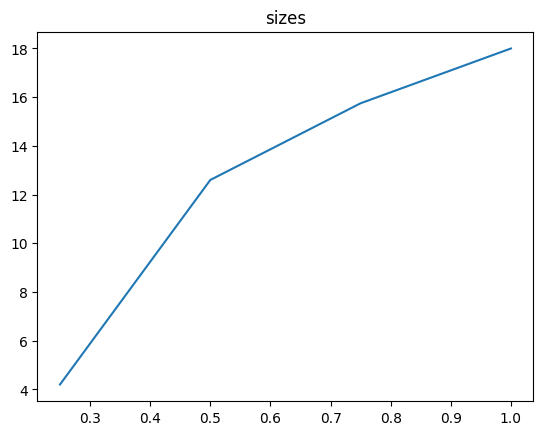

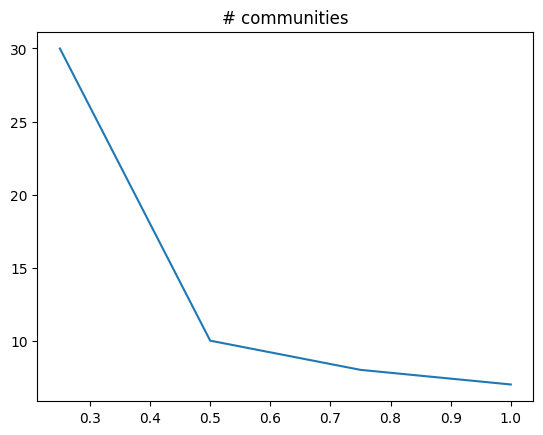

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sizes = []
nums = []
for r in [0.25, 0.5, .75, 1]:
  louvain_coms_r = algorithms.louvain(g, resolution=r)

  nums.append(len(louvain_coms_r.communities))
  sizes.append(np.mean([len(c) for c in louvain_coms_r.communities]))

plt.plot([0.25, 0.5, .75, 1], sizes)
plt.title('sizes')
plt.show()
plt.plot([0.25, 0.5, .75, 1], nums)
plt.title('# communities')
plt.show()


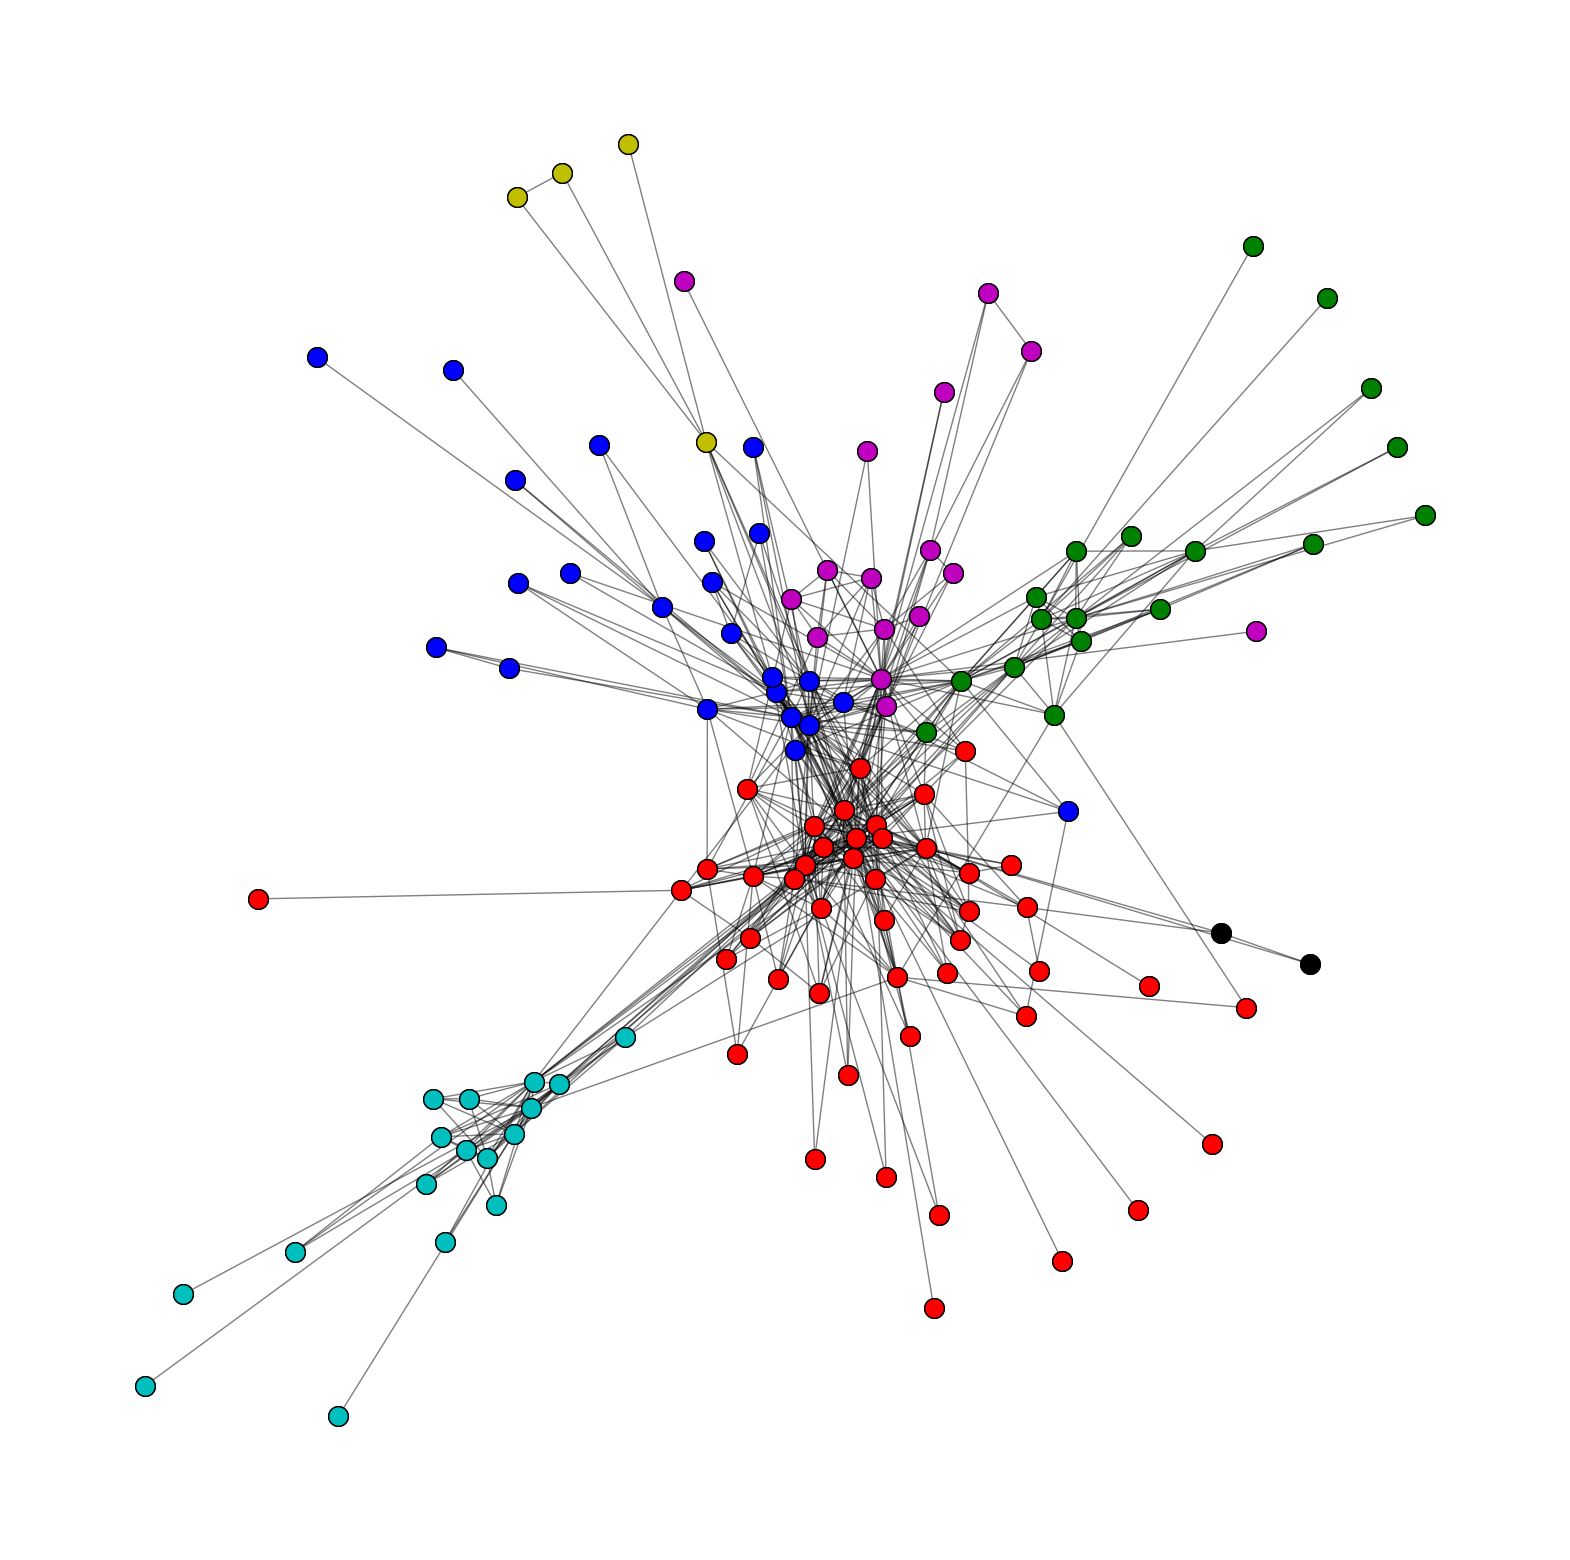

In [ ]:
from cdlib import viz
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, louvain_coms_r, pos, figsize=(20, 20))
plt.show()


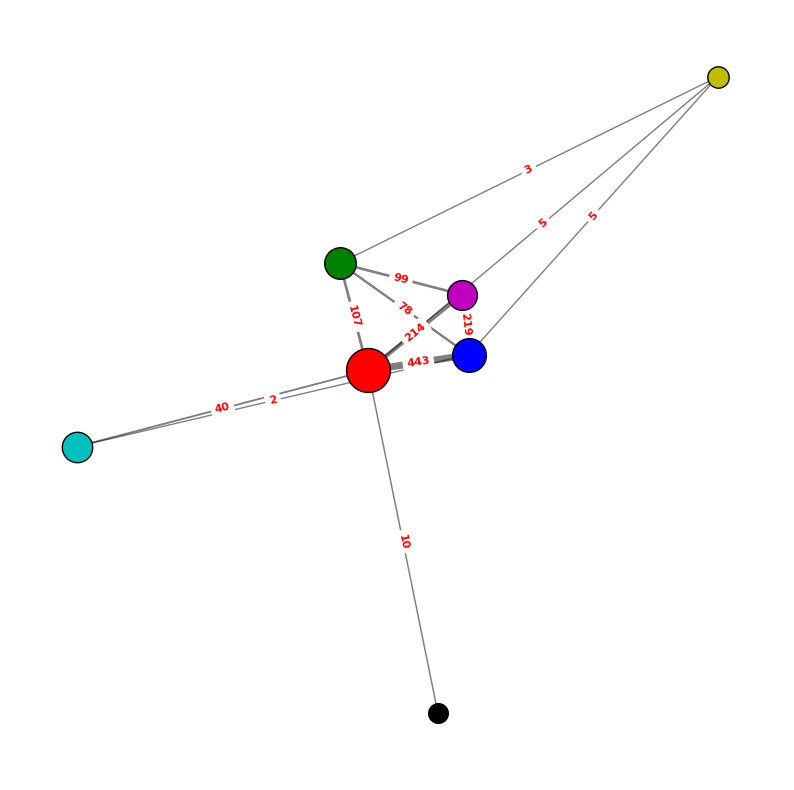

In [ ]:
viz.plot_community_graph(g, louvain_coms, figsize=(10, 10))

In [ ]:
infomap_coms = algorithms.infomap(g)
k_clique_coms = algorithms.kclique(g, k=3)
walktrap_coms = algorithms.walktrap(g)

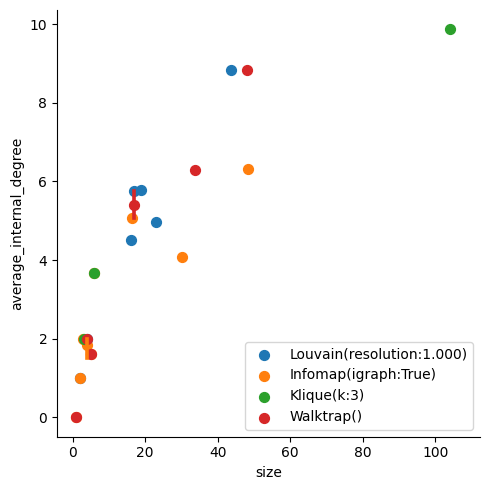

In [ ]:
viz.plot_com_properties_relation([louvain_coms, infomap_coms, k_clique_coms, walktrap_coms],
                                  evaluation.size,
                                  evaluation.average_internal_degree)


'Louvain'

In [ ]:
for com in [louvain_coms, infomap_coms, k_clique_coms, walktrap_coms]:
  print( com.method_name, evaluation.newman_girvan_modularity(g, com))

Louvain FitnessResult(min=None, max=None, score=0.5284663299009095, std=None)
Infomap FitnessResult(min=None, max=None, score=0.463403979708075, std=None)
Klique FitnessResult(min=None, max=None, score=-0.0019120770388042626, std=None)
Walktrap FitnessResult(min=None, max=None, score=0.4411863849878954, std=None)


In [ ]:
for com in [louvain_coms, infomap_coms, k_clique_coms, walktrap_coms]:
  print( com.method_name, evaluation.conductance(g, com))

Louvain FitnessResult(min=0.10909090909090909, max=1.0, score=0.6662931214668771, std=0.35318539372467295)
Infomap FitnessResult(min=0.10909090909090909, max=1.0, score=0.655621542236808, std=0.328592727687288)
Klique FitnessResult(min=0.01858736059479554, max=0.75, score=0.33185272250164005, std=0.3065129605168987)
Walktrap FitnessResult(min=0.10909090909090909, max=1.0, score=0.6368711347209272, std=0.37147442757778426)


In [ ]:
!wget https://andreafailla.github.io/uploads/data/got-s1-attrs.csv

--2024-12-02 08:14:15--  https://andreafailla.github.io/uploads/data/got-s1-attrs.csv
Resolving andreafailla.github.io (andreafailla.github.io)... 185.199.111.153, 185.199.108.153, 185.199.110.153, ...
Connecting to andreafailla.github.io (andreafailla.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3106 (3.0K) [text/csv]
Saving to: ‘got-s1-attrs.csv’

got-s1-attrs.csv    100%[===================>]   3.03K  --.-KB/s    in 0s      

2024-12-02 08:14:15 (40.6 MB/s) - ‘got-s1-attrs.csv’ saved [3106/3106]



In [ ]:
def load_node_attributes():
  node_attributes = {}
  with open('got-s1-attrs.csv') as f:
    next(f) # skip header
    for l in f:
      l = l.rstrip().split(",")
      node_attributes[l[0]] = l[2]
  return node_attributes
from collections import Counter
def community_purity(coms, attributes):
  purities = []
  for c in coms.communities:
    houses = []
    for node in c:
      if node in attributes:
        houses.append(attributes[node])
    cnt = Counter(houses)
    try:
      purity = max(cnt.values())/sum(cnt.values())
    except:
      continue
    purities.append(purity)
  return purities

In [ ]:
attrs = load_node_attributes()

In [ ]:
for com in [louvain_coms, infomap_coms, k_clique_coms, walktrap_coms]:
  print( com.method_name, np.mean(community_purity(com, attrs)))

Louvain 0.5133775936003693
Infomap 0.5596281271129142
Klique 0.6178608515057112
Walktrap 0.49035947712418304


In [ ]:
louvain_coms_r05 = algorithms.louvain(g, resolution=0.5)
for com in [infomap_coms, louvain_coms_r05, k_clique_coms, walktrap_coms]:
  print(com.method_name, evaluation.adjusted_mutual_information(louvain_coms, com))
